# This notebook was written by Hazim Emad

# Huffman Code

In [58]:
#Python Huffman Algorithm
#Code written by: Hazim Emad
#Mansoura University. ECE department

from math import log,fsum
class Huffman():
      def __init__(self, prob, symbols):
          #initialize a list to hold the binary representation of each probability
          self.binary = []

          #initialize a dictionary to keep track of how many probabilities make up the current probability
          self.count = {}

          #create a copy of the original probabilities list before sorting
          self.probCopy = prob.copy()

          #sort the probabilities list
          prob.sort()

          #store the list of probabilities
          self.prob = prob
 
          #create another copy of the probabilities list for updating the branches
          self.rep = prob.copy()

          #create variables for the metrics
          self.entropy = 0 
          self.l = 0 
          self.efficiency = 0 

          #store the list of symbols
          self.symbols = symbols
          
      def CheckCount(self, index):
          #initialize the count as 1 in case this probability was at the root
          number = 1

          #check if the probability existed before in the count dictionary which means that it is a sum of the combination of the root probabilities
          if(self.count.__contains__(index)):
            #update the count with the number of root probabilities that add up to this probability
            number = self.count[index][0]

            #remove the count for the number of root probabilities for this probability from the list in the dict
            self.count[index].pop(0)

            #check if the list in the dict is empty which means that none of the remaining root probabilities can add up to this probability again
            if(len(self.count[index]) == 0):
              #remove the list from the dict
              self.count.pop(index)
          return number
          
      def AssignBinaryNumber(self, binaryNumber, index, counter, temp):
          #check if their are still root probabilities that need their branches to be assigned to reach the current probability
          while (counter > 0):
            #decrement the number of root probabilities that need their branches to be assigned
            counter -= 1

            #assign the corresponding binary bit to the binary string of the root probability
            self.binary[self.rep.index(temp[index])] += binaryNumber

            #update the probability in the sorted list with the new sum of probabilities so that it doesn't get its branches assigned twice 
            self.rep[self.rep.index(temp[index])] = temp[0] + temp[1]

      def Calculate(self):
        
          #create a copy of the symbol list
          temp = self.symbols.copy()

          for i in range(len(self.prob)):
            #append the binary string with empty placeholders according to the number of probabilities:
            self.binary.append("")

            #sort the symbols list the according to the new sorted probabilty positions
            self.symbols[i] = temp[self.probCopy.index(self.prob[i])]
            #change the value of the unsorted probabilities list at the current position to something impossible
            #so that it doesn't get chosen again in case of duplicate probabilities
            self.probCopy[self.probCopy.index(self.prob[i])] = -1


          #reassign the probabilities list
          self.probCopy = prob.copy()

          #check if the sum of probabilities equals 1 
          if(fsum(self.prob) == 1):

            #loop until we reach a probability of 1
            while(self.prob.__contains__(1.00) is False):

              #update the temp list with the current list of probabilities
              temp=self.prob.copy()

              #sort the temp list
              temp.sort()

              #check the number of root probabilities that make up the current smallest two probabilities
              number1 = self.CheckCount(temp[0])
              number2 = self.CheckCount(temp[1])

              #check if the dict has a list for the number of root probabilities that make up the current smallest two probabilities               
              if(self.count.__contains__(temp[0] + temp[1]) is False):
                #create an empty list for the number of root probabilities that make up the current smallest two probabilities
                #we will keep track of all the current number of root probabilites that can make up the current probability in this list
                self.count[temp[0] + temp[1]]=[]

              #update the list in the dict with the corresponding number of root probabilities that make up the current smallest two probabilities
              self.count[temp[0] + temp[1]].append(number1 + number2)


              #assign the binary bits for the two branches (left 1 & right 0 when sorting from smallest to biggest probability) 
              self.AssignBinaryNumber("1", 0, number1, temp) #left branch
              self.AssignBinaryNumber("0", 1, number2, temp) #right branch

              #update the probability list with the sum of the current smallest two probabilities and remove the current smallest two probabilities
              self.prob.remove(temp[0])
              self.prob.remove(temp[1])
              self.prob.append(temp[0] + temp[1])

            #loop according to the number of probabilities
            for i in range(len(self.probCopy)):
              #calculate the metrics
              self.l += len(self.binary[i]) * self.probCopy[i]
              self.entropy += -self.probCopy[i] * log(self.probCopy[i], 2)
              self.efficiency = (self.entropy / self.l) * 100
          
          else:
            print('------------------')
            print('------------------')
            print("Error: sum of probabilities is not 1")
            print('------------------')
            print('------------------')

# Example on English alphabets
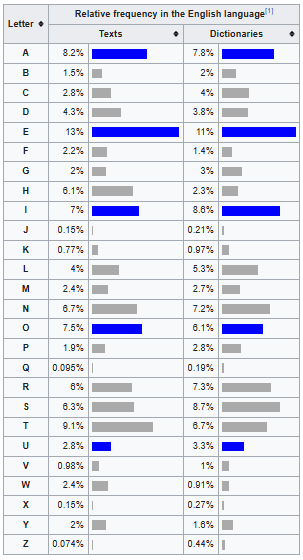

[Wikipedia Reference - https://en.wikipedia.org/wiki/Letter_frequency](https://en.wikipedia.org/wiki/Letter_frequency)

In [59]:
#The following code will be used to apply the Huffman Algorithm on the English Alphabet
#Probabilities of English Alphabets (some approximations were taken)
prob=[0.08,0.02,0.03,0.04,0.13,0.02,0.02,0.06,0.07,0.003,0.012,0.04,0.02,
      0.07,0.08,0.02,0.001,0.06,0.06,0.09,0.02,0.01,0.02,0.003,0.02,0.001]
symbols=['a','b','c','d','e','f','g','h','i','j','k','l','m',
         'n','o','p','q','r','s','t','u','v','w','x','y','z']
h=Huffman(prob, symbols)
h.Calculate()
print(h.probCopy)
for i in range(len(h.probCopy)):
  print("The binary representation of " + h.symbols[i] +" is " + str(h.binary[i][::-1]))
print("H= " + str(h.entropy))
print("L= " + str(h.l))
print("Efficiency= " + str(h.efficiency)+"%")
#You can change the value of symbols to h.prob if you want to display the probabilities instead of the #symbols
#I have uploaded the script on this drive in case you wanted to try the code:

[0.001, 0.001, 0.003, 0.003, 0.01, 0.012, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.04, 0.04, 0.06, 0.06, 0.06, 0.07, 0.07, 0.08, 0.08, 0.09, 0.13]
The binary representation of q is 1011001011
The binary representation of z is 1011001010
The binary representation of j is 101100100
The binary representation of x is 10110011
The binary representation of v is 1011000
The binary representation of k is 101101
The binary representation of b is 001111
The binary representation of f is 001110
The binary representation of g is 001101
The binary representation of m is 001100
The binary representation of p is 001011
The binary representation of u is 001010
The binary representation of w is 001001
The binary representation of y is 001000
The binary representation of c is 10111
The binary representation of d is 00011
The binary representation of l is 00010
The binary representation of h is 1010
The binary representation of r is 1001
The binary representation of s is 1000
The binary re

# Another Random Example

In [60]:
prob=[1/2, 1/8, 1/8, 1/8, 1/16, 1/16]
symbols=['a','b','c','d','e','f']
h=Huffman(prob, symbols)
h.Calculate()
print(h.probCopy)
for i in range(len(h.probCopy)):
  print("The binary representation of " + h.symbols[i] +" is " + str(h.binary[i][::-1]))
print("H= " + str(h.entropy))
print("L= " + str(h.l))
print("Efficiency= " + str(h.efficiency)+"%")
#You can change the value of symbols to h.prob if you want to display the probabilities instead of the #symbols
#I have uploaded the script on this drive in case you wanted to try the code:

[0.0625, 0.0625, 0.125, 0.125, 0.125, 0.5]
The binary representation of e is 1111
The binary representation of f is 1110
The binary representation of b is 110
The binary representation of c is 101
The binary representation of d is 100
The binary representation of a is 0
H= 2.125
L= 2.125
Efficiency= 100.0%
